<a href="https://colab.research.google.com/github/Rajakumaran-S/Seoul_Bike_Sharing_Demand_Prediction-_Capstone_Project-II/blob/main/Raja_Bike_Sharing_Demand_Prediction_Capstone_Project_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> 1. Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

## <b>2. Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of the day
* ### Temperature-Temperature in Celsius
* ### Humidity - Humidity measures %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

##<b>Know Our Data:

## <b>1. Importing Necessory Library

In [ ]:
# Importing the libraries

import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

##<b>2. Reading Dataset

In [ ]:
# Mounting  google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Reading dataset

df = pd.read_csv('/content/drive/MyDrive/Alma Better/SeoulBikeData.csv',encoding= 'unicode_escape',parse_dates=['Date'])

## <b> 3. Overview of data

In [ ]:
# head of sample data:

df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
# Information of dataset:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

### <b>Observation:
* There are 14 Columns and 8760 Rows in the Dataset.
* 9 No of Numerical Variables, 1 column Datetime and 4 No of Categorical variables are there
* There No Null Values in the Dataset.

In [ ]:
# description of data:
df.describe('all')

TypeError: ignored

In [ ]:
# Columns:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
#print the unique value
df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

## <b><u> Features description

**Breakdown of Our Features:**

**Date** : *The date of the day, during 365 days from 01/12/2017 to 30/11/2018, formating in DD/MM/YYYY, type : datetime*

**Rented Bike Count** : *Number of rented bikes per hour which our dependent variable and we need to predict that, type : int*

**Hour**: *The hour of the day, starting from 0-23 it's in a digital time format, type : int, we need to convert it into category data type.*

**Temperature(°C)**: *Temperature in Celsius, type : Float*

**Humidity(%)**: *Humidity in the air in %, type : int*

**Wind speed (m/s)** : *Speed of the wind in m/s, type : Float*

**Visibility (10m)**: *Visibility in m, type : int*

**Dew point temperature(°C)**: *Temperature at the beggining of the day, type : Float*

**Solar Radiation (MJ/m2)**: *Sun contribution, type : Float*

**Rainfall(mm)**: *Amount of raining in mm, type : Float*

**Snowfall (cm)**: *Amount of snowing in cm, type : Float*

**Seasons**: *Season of the year, type : str, there are only 4 season's in data*. 

**Holiday**: *If the day  is holiday period or not, type: str*

**Functioning Day**: *If the day is a Functioning Day or not, type : str*






## <b><u>Preprocessing the data:

In [ ]:
#Missing values
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [ ]:
# Checking duplicate values in dataset
df.duplicated().sum()

0

In [ ]:
# split day of week, month and year in three column
df['day_of_week'] = df['Date'].dt.day_name() # extract week name from Date column
df["month"] = df['Date'].dt.month_name()   # extract month name from Date column
df["year"] = df['Date'].map(lambda x: x.year).astype('object')    # extract year from Date column and convert to onject type

In [ ]:
#creating a new column of "weekdays_weekend" and drop the column "Date","day","year"
df['weekdays_weekend']=df['day_of_week'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
df=df.drop(columns=['Date','year','month'],axis=1)

In [ ]:
# convert Hour,month, column integer to Categorical 
# df['Hour']=df['Hour'].astype('object')
# df['month']=df['month'].astype('object')
df['weekdays_weekend']=df['weekdays_weekend'].astype('object')

In [ ]:
# Finally Check Info of data:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  day_of_week                8760 non-null   objec

### <b>Observation:
* In the above data after count the missing and duplicate value we came to know that there are no missing and duplicate value present.
* So we convert the "date" column into 3 different column i.e "year","month","day".
* The "year" column in our data set is basically contain the 2 unique number contains the details of from 2017 december to 2018 november so if i consider this is a one year then we don't need the "year" column so we drop it.
* The other column "day", it contains the details about the each day of the month, for our relevence we don't need each day of each month data but we need the data about, if a day is a weekday or a weekend so we convert it into this format and drop the "day" column.


## <b><u>Performing Some EDA:

[Text(0.5, 1.0, 'Count of Rented bikes acording to weekdays and weekend ')]

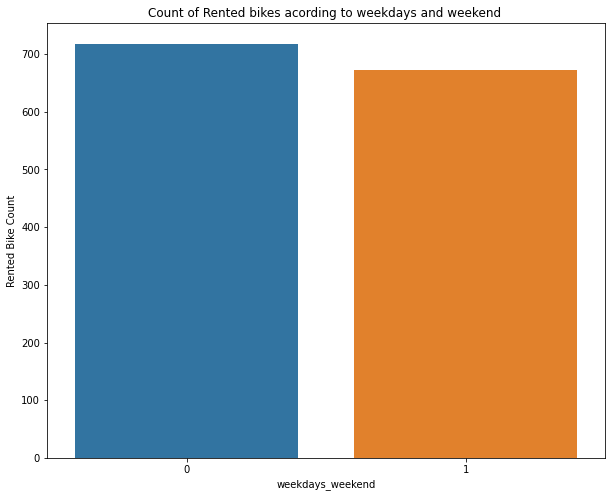

In [ ]:
#anlysis of Count of Rented bikes acording to weekdays and weekend by vizualisation
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=df,x='weekdays_weekend',y='Rented Bike Count',ax=ax,ci = 0)
ax.set(title='Count of Rented bikes acording to weekdays and weekend ')

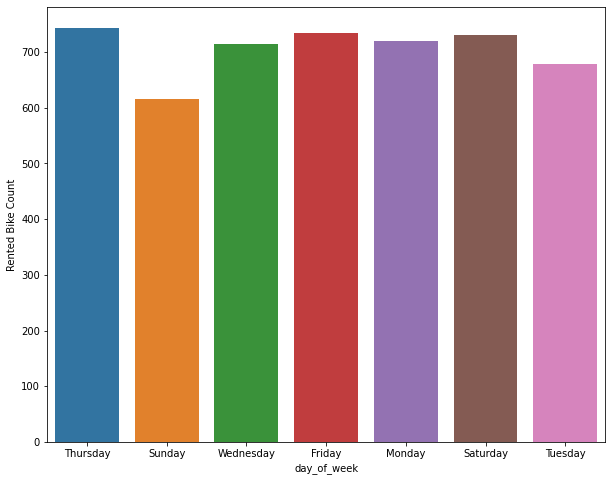

In [ ]:
#anlysis of Count of Rented bikes acording to Each Day of Week and weekend by vizualisation
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=df,x='day_of_week',y='Rented Bike Count',ax=ax,ci = 0)

In [ ]:
df

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,day_of_week,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday,0
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday,0
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday,0
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday,0


In [ ]:
#Count of Rented bikes acording to weekdays_weekend
data=df.groupby(df['weekdays_weekend'])['Rented Bike Count'].sum().reset_index()['Rented Bike Count']
data

0    4462544
1    1709770
Name: Rented Bike Count, dtype: int64

Text(0.5, 1.0, 'Count of Rented bikes acording to weekdays_weekend')

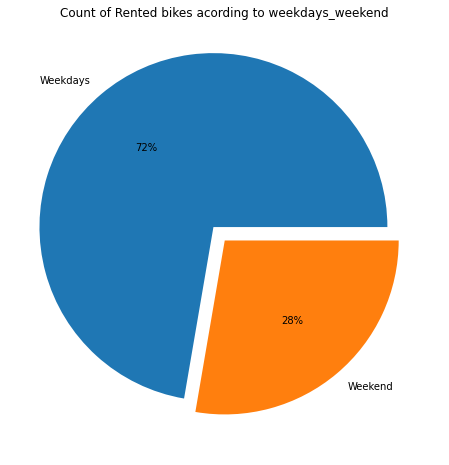

In [ ]:
#anlysis of Count of Rented bikes acording to weekdays_weekend by vizualisation
fig, ax = plt.subplots(figsize =(8, 8))
plt.pie(data,autopct='%1.0f%%',labels =['Weekdays','Weekend'],explode=(0.1,0.0009))
ax.set_title('Count of Rented bikes acording to weekdays_weekend')


[Text(0.5, 1.0, 'Count of Rented bikes acording to Holiday')]

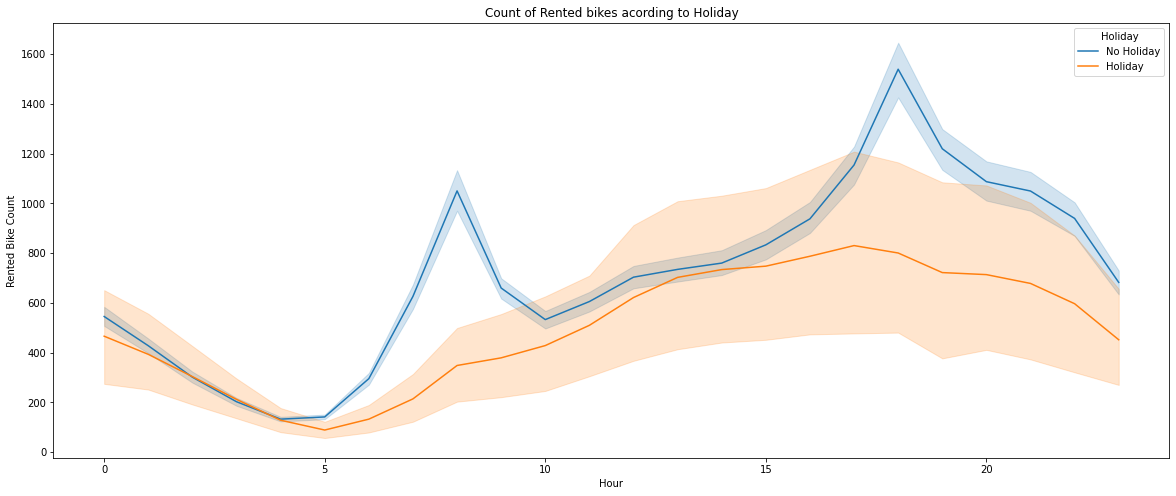

In [ ]:
#anlysis of Count of Rented bikes acording to Holiday by vizualisation
fig,ax=plt.subplots(figsize=(20,8))
sns.lineplot(data=df,x='Hour',y='Rented Bike Count',hue='Holiday',ax=ax)
ax.set(title='Count of Rented bikes acording to Holiday')

In [ ]:
df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'day_of_week', 'weekdays_weekend'],
      dtype='object')

Text(0.5, 1.0, 'Count of Rented bikes acording to weekdays')

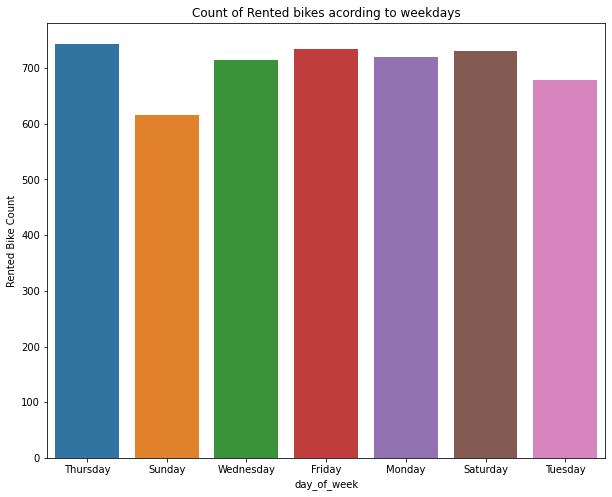

In [ ]:
#anlysis of Count of Rented bikes acording to weekdays by vizualisation
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=df,x='day_of_week',y='Rented Bike Count',ax=ax,ci = 0)
ax.set_title('Count of Rented bikes acording to weekdays')

Text(0.5, 1.0, 'Temprature Disribution')

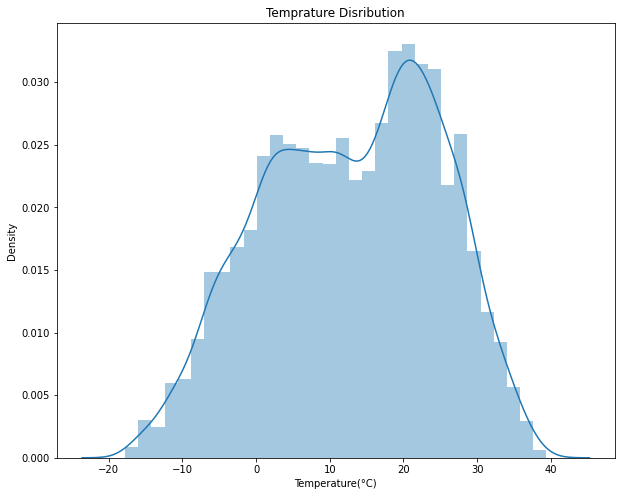

In [ ]:
# Visualization of Temprature Disribution
fig,ax=plt.subplots(figsize=(10,8))
sns.distplot(df['Temperature(°C)'],ax=ax)
ax.set_title('Temprature Disribution')

Text(0.5, 1.0, 'Count of Rented bikes acording to Temprature range')

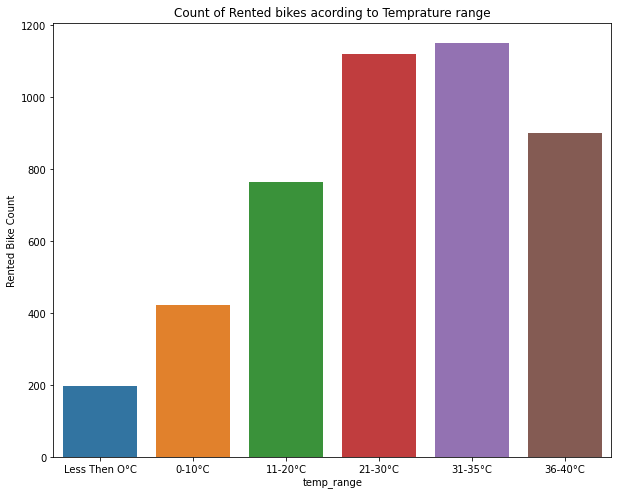

In [ ]:
#anlysis of Count of Rented bikes acording to Temprature range by vizualisation
df['temp_range']=df['Temperature(°C)'].map(lambda x: 'Less Then O°C' if x<0 else '0-10°C' if 0<=x<=10 else '11-20°C' if 10<x<=20 else '21-30°C' if 20<x<=30 else '31-35°C' if 30<x<=35 else '36-40°C' if 35<x<40 else 'More then 40°C')
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=df,x='temp_range',y='Rented Bike Count',ax=ax,ci = 0)
ax.set_title('Count of Rented bikes acording to Temprature range')

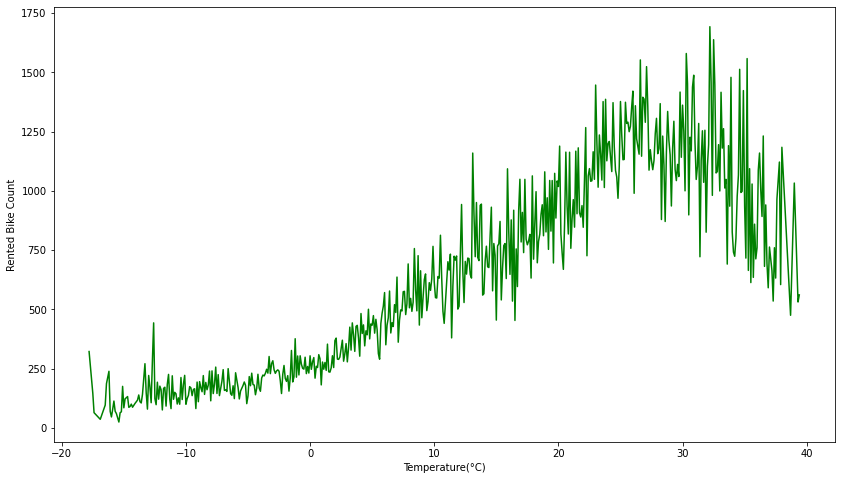

In [ ]:
fig=plt.figure(figsize=(14,8))
ax=plt.gca()
sns.lineplot(data=df.groupby('Temperature(°C)').mean()['Rented Bike Count'],ax=ax,color='g')


[Text(0.5, 1.0, 'Count of Rented bikes acording to Seasons ')]

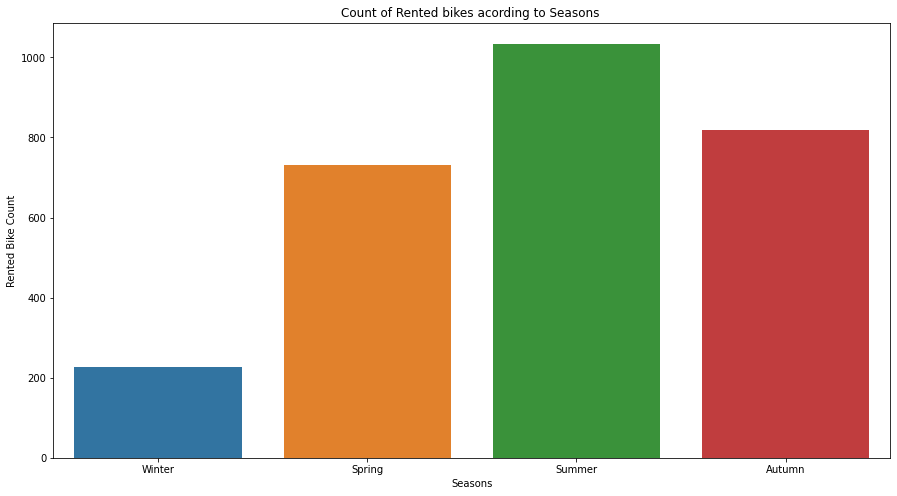

In [ ]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=df,x='Seasons',y='Rented Bike Count',ax=ax,ci=0)
ax.set(title='Count of Rented bikes acording to Seasons ')

In [ ]:
# #anlysis of data by vizualisation
# fig=plt.figure(figsize=(14,8))
# ax=plt.gca()
# sns.barplot(data=df,x='month',y='Rented Bike Count',ax=ax,ci = 0)
# ax.set(title='Count of Rented bikes acording to Month ')

## <b>Analyze of Numerical variables

In [ ]:
# Numerical Columns
num_col=set(df.describe().columns.to_list())-{'Rented Bike Count'}
print(num_col)

{'Snowfall (cm)', 'Dew point temperature(°C)', 'Temperature(°C)', 'Humidity(%)', 'Hour', 'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Wind speed (m/s)'}


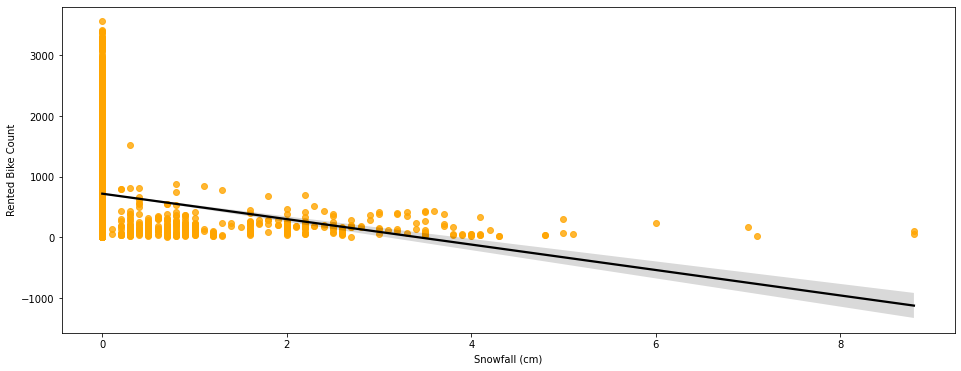

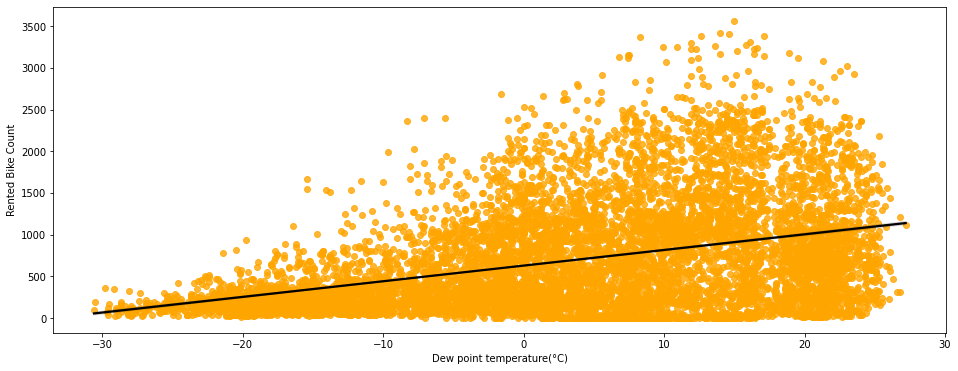

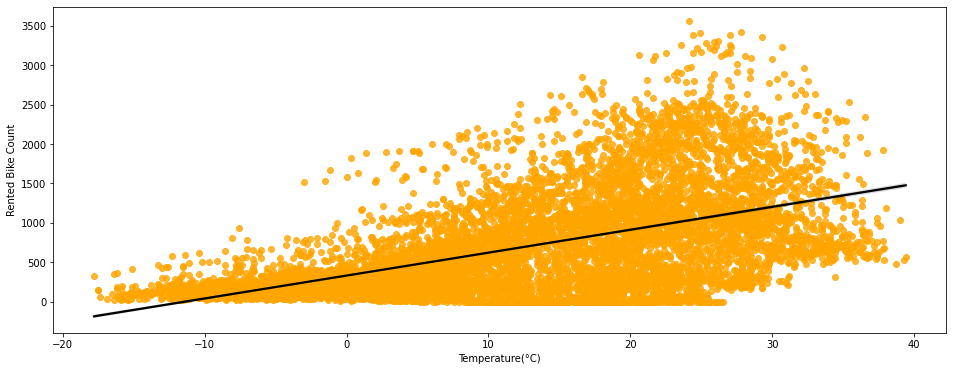

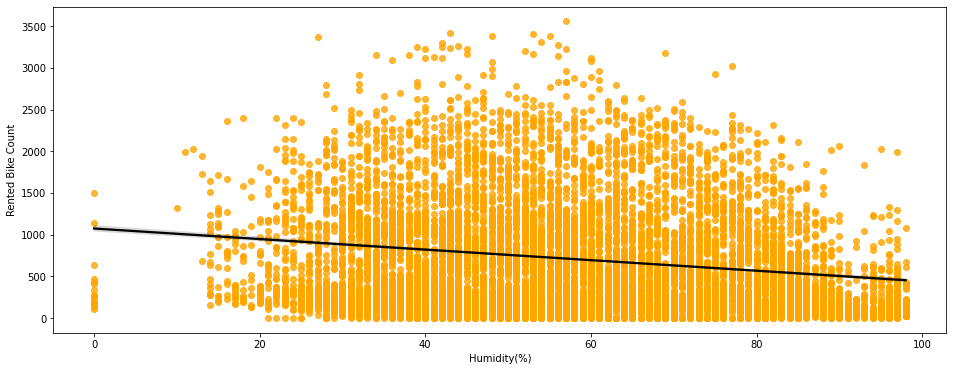

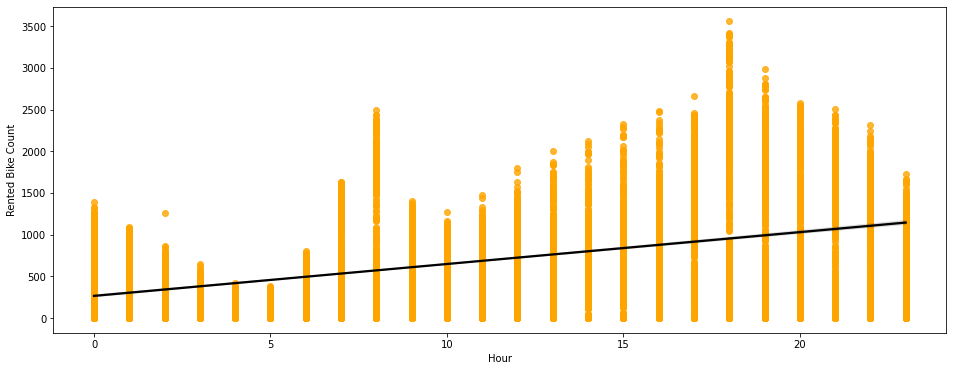

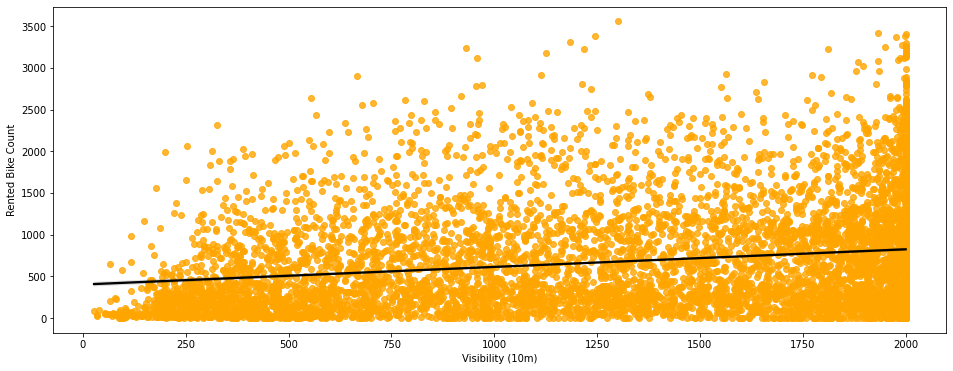

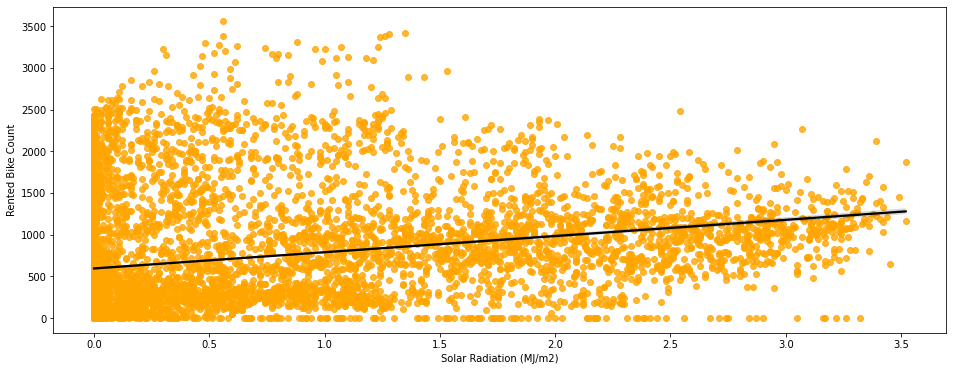

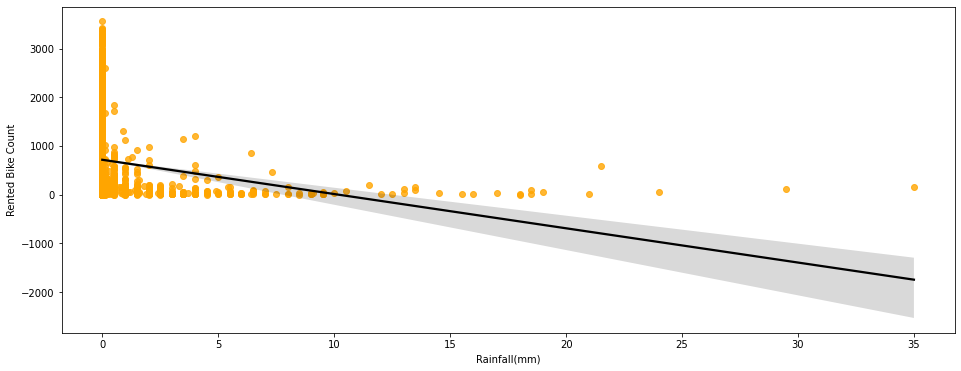

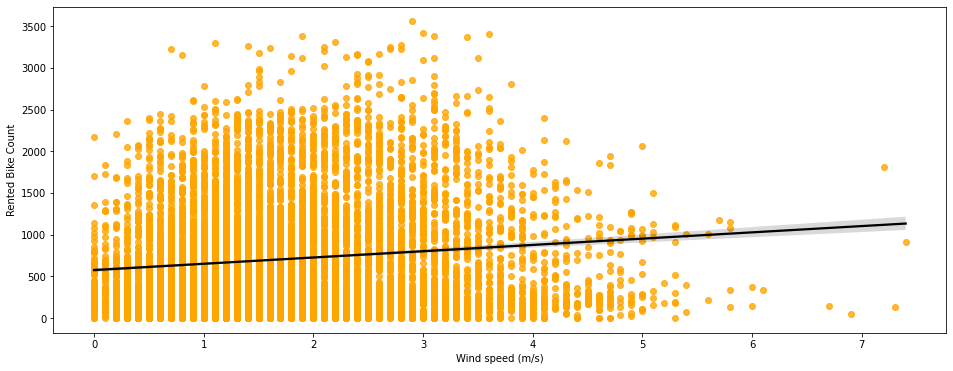

In [ ]:
#printing the regression plot for all the numerical features
for col in num_col:
  fig,ax=plt.subplots(figsize=(16,6))
  sns.regplot(x=df[col],y=df['Rented Bike Count'],scatter_kws={"color": 'orange'}, line_kws={"color": "black"})

##**Checking of Correlation between variables**


In [ ]:
# Correlation with Rented Bike Count
df.corr()['Rented Bike Count']

Rented Bike Count            1.000000
Hour                         0.410257
Temperature(°C)              0.538558
Humidity(%)                 -0.199780
Wind speed (m/s)             0.121108
Visibility (10m)             0.199280
Dew point temperature(°C)    0.379788
Solar Radiation (MJ/m2)      0.261837
Rainfall(mm)                -0.123074
Snowfall (cm)               -0.141804
Name: Rented Bike Count, dtype: float64

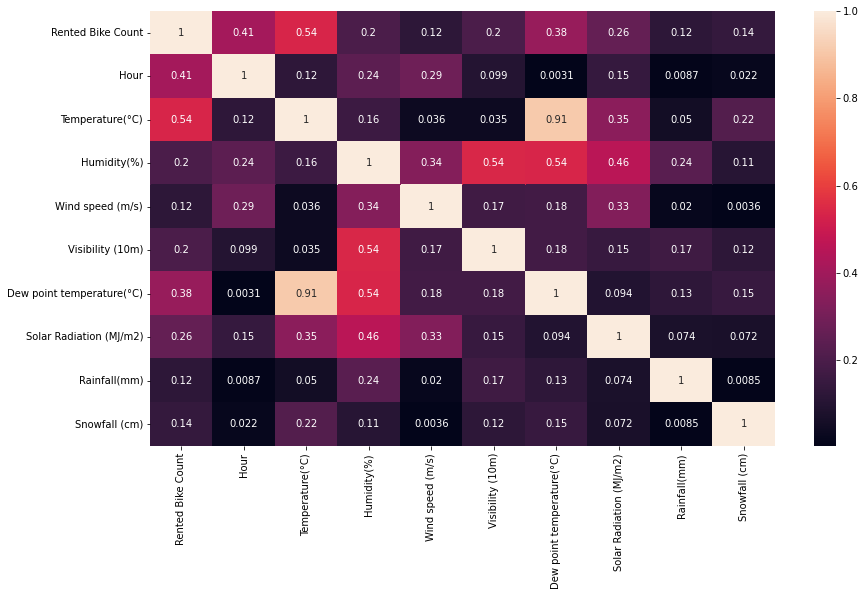

In [ ]:
# using seaborn heatmap for ploting correlation graph 
fig=plt.figure(figsize=(14,8))
ax=plt.gca()
sns.heatmap(abs(df.corr()),ax=ax,annot=True)

### <b>Observation:
 * From the Heat map, we got high Corelation Between Temperature and Dew Point Temperatue.

## <b>Checking Multicollinearity

In [ ]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)

In [ ]:
#Check Multicollinearity of Numerical Columns
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count']]])

,variables,VIF
0,Hour,4.418242
1,Temperature(°C),33.385256
2,Humidity(%),5.371996
3,Wind speed (m/s),4.805364
4,Visibility (10m),9.085977
5,Dew point temperature(°C),17.126199
6,Solar Radiation (MJ/m2),2.881590
7,Rainfall(mm),1.081567
8,Snowfall (cm),1.120833


In [ ]:
#Check Multicollinearity of Numerical Columns by Removing High VIF value of column Temperature
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count','Temperature(°C)']]]) 

,variables,VIF
0,Hour,3.847933
1,Humidity(%),5.262460
2,Wind speed (m/s),4.729187
3,Visibility (10m),4.964387
4,Dew point temperature(°C),1.656085
5,Solar Radiation (MJ/m2),1.914776
6,Rainfall(mm),1.079939
7,Snowfall (cm),1.111339


In [ ]:
#final Numerical Columns
num_col_list=list(num_col-{'Temperature(°C)'})
num_col_list

['Snowfall (cm)',
 'Dew point temperature(°C)',
 'Humidity(%)',
 'Hour',
 'Visibility (10m)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Wind speed (m/s)']

In [ ]:
#Final Numerical Column Dataset
num_col_df=df[num_col_list]
num_col_df

,Snowfall (cm),Dew point temperature(°C),Humidity(%),Hour,Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Wind speed (m/s)
0,0.0,-17.6,37,0,2000,0.0,0.0,2.2
1,0.0,-17.6,38,1,2000,0.0,0.0,0.8
2,0.0,-17.7,39,2,2000,0.0,0.0,1.0
3,0.0,-17.6,40,3,2000,0.0,0.0,0.9
4,0.0,-18.6,36,4,2000,0.0,0.0,2.3
...,...,...,...,...,...,...,...,...
8755,0.0,-10.3,34,19,1894,0.0,0.0,2.6
8756,0.0,-9.9,37,20,2000,0.0,0.0,2.3
8757,0.0,-9.9,39,21,1968,0.0,0.0,0.3
8758,0.0,-9.8,41,22,1859,0.0,0.0,1.0


###<b> Observation:
* While checking Multocollinearity by using variance infuance Factor, Temperature having high VIF value. so we removed that.

## <b> Dealing with Categorical Columns Preprocessing:

In [ ]:
# Categorical Columns List
cat_col_list=list(set(df.describe(include=['object']).columns.to_list())-{'day_of_week','temp_range','weekdays_weekend'})
cat_col_list

['Seasons', 'Holiday', 'Functioning Day']

In [ ]:
# Categorical Columns Dataset
new_cat_col=df[cat_col_list]
new_cat_col

,Seasons,Holiday,Functioning Day
0,Winter,No Holiday,Yes
1,Winter,No Holiday,Yes
2,Winter,No Holiday,Yes
3,Winter,No Holiday,Yes
4,Winter,No Holiday,Yes
...,...,...,...
8755,Autumn,No Holiday,Yes
8756,Autumn,No Holiday,Yes
8757,Autumn,No Holiday,Yes
8758,Autumn,No Holiday,Yes


In [ ]:
# Data encoding with Numerical Value
encoders_nums = {"Holiday":{"Holiday":1,"No Holiday":0},
                 "Functioning Day":{"Yes":1,"No":0}}

new_cat_col = new_cat_col.replace(encoders_nums)

In [ ]:
# Hot Encoding remainging Categorical Feature: 
cat_col_df= pd.get_dummies(new_cat_col, columns=["Seasons"])
cat_col_df

,Holiday,Functioning Day,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,0,1,0,0,0,1
1,0,1,0,0,0,1
2,0,1,0,0,0,1
3,0,1,0,0,0,1
4,0,1,0,0,0,1
...,...,...,...,...,...,...
8755,0,1,1,0,0,0
8756,0,1,1,0,0,0
8757,0,1,1,0,0,0
8758,0,1,1,0,0,0


In [ ]:
#Join both Numerical and Categorical Columns Features in Final Dataset(independent variables)
final_df=pd.concat((num_col_df,cat_col_df),axis=1)
final_df


,Snowfall (cm),Dew point temperature(°C),Humidity(%),Hour,Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Wind speed (m/s),Holiday,Functioning Day,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,0.0,-17.6,37,0,2000,0.0,0.0,2.2,0,1,0,0,0,1
1,0.0,-17.6,38,1,2000,0.0,0.0,0.8,0,1,0,0,0,1
2,0.0,-17.7,39,2,2000,0.0,0.0,1.0,0,1,0,0,0,1
3,0.0,-17.6,40,3,2000,0.0,0.0,0.9,0,1,0,0,0,1
4,0.0,-18.6,36,4,2000,0.0,0.0,2.3,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,0.0,-10.3,34,19,1894,0.0,0.0,2.6,0,1,1,0,0,0
8756,0.0,-9.9,37,20,2000,0.0,0.0,2.3,0,1,1,0,0,0
8757,0.0,-9.9,39,21,1968,0.0,0.0,0.3,0,1,1,0,0,0
8758,0.0,-9.8,41,22,1859,0.0,0.0,1.0,0,1,1,0,0,0


In [ ]:
#Final Dataset Columns (independent variables)
columns=final_df.describe(include='all').columns
columns

Index(['Snowfall (cm)', 'Dew point temperature(°C)', 'Humidity(%)', 'Hour',
       'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)',
       'Wind speed (m/s)', 'Holiday', 'Functioning Day', 'Seasons_Autumn',
       'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter'],
      dtype='object')

In [ ]:
#Final Dataset information (independent variables)
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Snowfall (cm)              8760 non-null   float64
 1   Dew point temperature(°C)  8760 non-null   float64
 2   Humidity(%)                8760 non-null   int64  
 3   Hour                       8760 non-null   int64  
 4   Visibility (10m)           8760 non-null   int64  
 5   Solar Radiation (MJ/m2)    8760 non-null   float64
 6   Rainfall(mm)               8760 non-null   float64
 7   Wind speed (m/s)           8760 non-null   float64
 8   Holiday                    8760 non-null   int64  
 9   Functioning Day            8760 non-null   int64  
 10  Seasons_Autumn             8760 non-null   uint8  
 11  Seasons_Spring             8760 non-null   uint8  
 12  Seasons_Summer             8760 non-null   uint8  
 13  Seasons_Winter             8760 non-null   uint8

In [ ]:
#Final indipendent variables
X=final_df

## <b>Normalise Target variable - Rented_Bike_Count column data

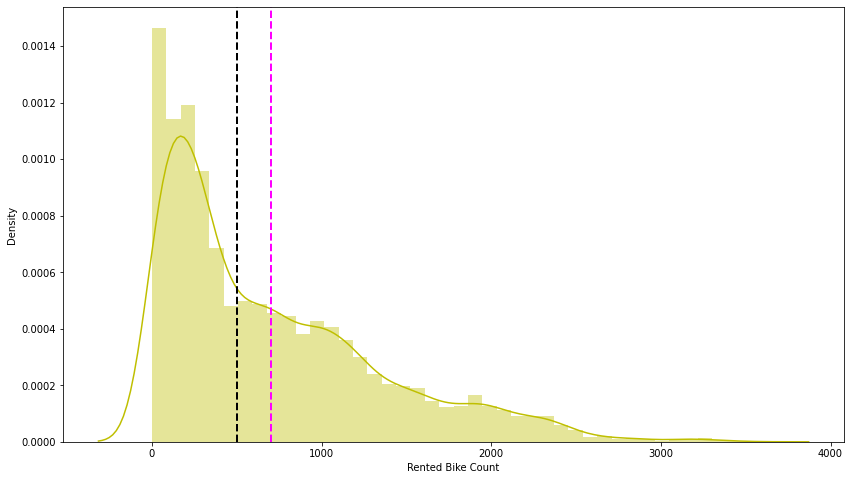

In [ ]:
#Distribution plot of Rented Bike Count
plt.figure(figsize=(14,8))
plt.xlabel('Rented Bike Count')
plt.ylabel('Density')
ax=sns.distplot(df['Rented Bike Count'],hist=True ,color="y")
ax.axvline(df['Rented Bike Count'].mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(df['Rented Bike Count'].median(), color='black', linestyle='dashed', linewidth=2)
plt.show()

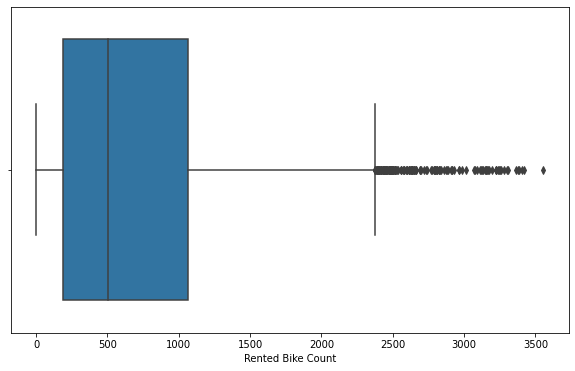

In [ ]:
#Boxplot of Rented Bike Count to check outliers
plt.figure(figsize=(10,6))
sns.boxplot(x=df['Rented Bike Count'])
plt.show()

Text(0.5, 1.0, 'Square root')

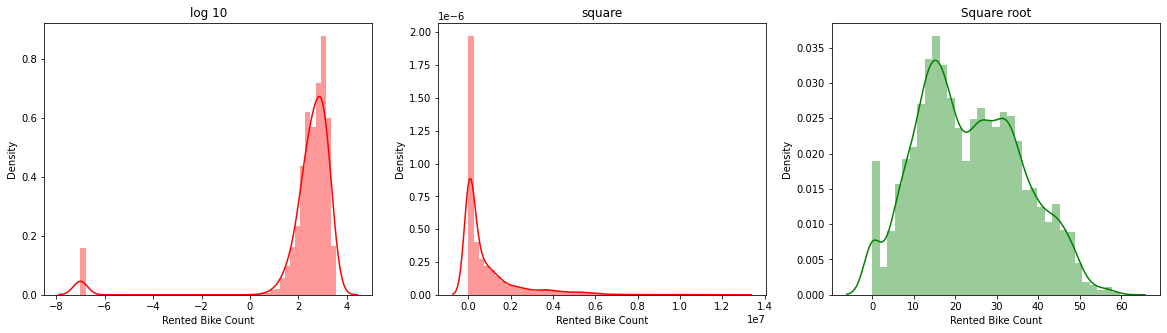

In [ ]:
fig,axes = plt.subplots(1,3,figsize=(20,5))
sns.distplot(np.log10(df['Rented Bike Count']+0.0000001),ax=axes[0],color='red').set_title("log 10")
sns.distplot((df['Rented Bike Count']**2),ax=axes[1],color='red').set_title("square")
sns.distplot(np.sqrt(df['Rented Bike Count']),ax=axes[2], color='green').set_title("Square root")

In [ ]:
#Target Variable
y=np.sqrt(df['Rented Bike Count'])

###<b>Observation:
* In above Distribution Plots Squre Root of Target variable perfected fitting of normal Distribution compared to log and squre.

## <b>Splitting Training & Testing Dataset

In [ ]:
#Spliting datadet into Training Dataset and Testing Dataset
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(7008, 14)
(1752, 14)


## <b>Scaling Training and Testing Dataset with Standard Scaling

In [ ]:
# Standard Scaling
scaler = MinMaxScaler()

X_train= scaler.fit_transform(X_train)
X_test= scaler.fit_transform(X_test)

##<b> Applying Normal Linear Regression

In [ ]:
#Apply Linear Regression to the Training Dataset
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [ ]:
#Checking Coefficient of independent variable
regressor.coef_

array([ 1.39223163e+00,  2.93131372e+01, -2.81581981e+01,  1.13576026e+01,
        2.59897362e-01, -2.23433921e+00, -4.98343333e+01,  1.04172264e+00,
       -2.79495978e+00,  2.84814614e+01,  3.76137816e+13,  3.76137816e+13,
        3.76137816e+13,  3.76137816e+13])

In [ ]:
#Checking Y-Intercept
regressor.intercept_

-37613781571112.84

In [ ]:
#Lets Predict target variable using Testing dataset
y_pred_train=regressor.predict(X_train)
y_pred_test=regressor.predict(X_test)

## <b>Accuracy of Predicted Training Dataset

In [ ]:
#calculate MSE
MSE_lr=mean_squared_error((y_train**2),(y_pred_train**2))
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)

#calculate r2 and adjusted r2
r2_lr= r2_score(y_train**2, y_pred_train**2)
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score(y_train**2, y_pred_train**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_lr)

MSE : 173863.49535142293
RMSE : 416.9694177651677
R2 : 0.5812970075149844
Adjusted R2 : 0.5779223144264465


## <b>Accuracy of Predicted Testing Dataset

In [ ]:
#calculate MSE
MSE_lr=mean_squared_error((y_test**2),(y_pred_test**2))
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)

#calculate r2 and adjusted r2
r2_lr= r2_score(y_test**2, y_pred_test**2)
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score(y_test**2, y_pred_test**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_lr)

MSE : 178314.4451618604
RMSE : 422.2729510184857
R2 : 0.5739430795828901
Adjusted R2 : 0.5705091147666326


## <b>Lasso Regression

In [ ]:
# Hiper parameter tuning with Cross validation Method
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
# parameters = {'alpha': np.linspace(-10,10,100)}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error',cv=5)

#Fitting Lasso Regression wit h training dataset
lasso_regressor.fit(X_train, y_train)
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)
#Predicting with testing dataset
y_pred_lasso=lasso_regressor.predict(X_test)

The best fit alpha value is found out to be : {'alpha': 0.0014}

Using  {'alpha': 0.0014}  the negative mean squared error is:  -53.628955681555894


In [ ]:
#calculate MSE
MSE_lr=mean_squared_error((y_test**2), (y_pred_lasso**2))
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)

#calculate r2 and adjusted r2
r2_lr= r2_score(y_test**2, y_pred_lasso**2)
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score(y_test**2, y_pred_lasso**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_test**2, y_pred_lasso**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 178503.1281052066
RMSE : 422.496305433795
R2 : 0.5734922486156944
Adjusted R2 : 0.5700546501589412


## <b> Ridge Regression

In [ ]:
# Hiper parameter tuning with Cross validation Method
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
#Fitting Lasso Regression wit h training dataset
ridge_regressor.fit(X_train,y_train)
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)
#Predicting with testing dataset
y_pred_ridge=ridge_regressor.predict(X_test)

The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -53.603328390261765


In [ ]:
#calculate MSE
MSE_rr=mean_squared_error((y_test**2), (y_pred_ridge**2))
print("MSE :",MSE_rr)

#calculate RMSE
RMSE_rr=np.sqrt(MSE_rr)
print("RMSE :",RMSE_rr)

#calculate r2 and adjusted r2
r2_rr= r2_score(y_test, y_pred_ridge)
print("R2 :",r2_rr)
Adjusted_R2_lr = (1-(1-r2_score(y_test**2, y_pred_ridge**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_lr)

MSE : 178343.39482678942
RMSE : 422.3072280068024
R2 : 0.6476339572700973
Adjusted R2 : 0.5704393861632865


## <b> Random Forest Regressor

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

rfr.fit(X_train,y_train)
y_pred = rfr.predict(X_test)
y_pred_train  = rfr.predict(X_train)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

rfr.fit(X_train,y_train)

param_grid = {'bootstrap': [True],
    'max_depth': [90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [50,60,60],
    'min_samples_split': [50,100,150],
    'n_estimators': [200, 300, 1000]}

g_sr = GridSearchCV(estimator = rfr, param_grid = param_grid, scoring = 'neg_mean_squared_error',
                          cv = 5)

y_pred = rfr.predict(X_test)
y_pred_train  = rfr.predict(X_train)

In [ ]:
g_sr.fit(X_train,y_train)
g_sr.best_params_

KeyboardInterrupt: ignored

In [ ]:
rf = RandomForestRegressor( bootstrap = True,
 max_depth = 90,
 max_features = 3,
 min_samples_leaf = 50,
 min_samples_split = 100,
 n_estimators = 300)

rf.fit(X_train,y_train)

In [ ]:
# Caluculating Metrics of ML model

# Cheching the Mean Squared Error
mse  = mean_squared_error(y_test**2, y_pred**2)
# Printing the Results of Mean Squared Error
print('MSE: ',mse)
print('*'*30)

# Cheching the Root Mean Squared Error
rmse = np.sqrt(mse)
# Printing the Results of Root Mean Squared Error
print('RMSE: ',rmse)
print('*'*30)

# Cheching the Root Mean Absolute Error
MAE = mean_absolute_error(y_test**2, y_pred**2)
# Printing the Results of Mean Absolute Error
print('MAE: ',MAE)
print('*'*30)

# Cheching the R2 Score on train & test Data
r2_train = r2_score(y_train**2,y_pred_train**2)
r2_test = r2_score(y_test**2, y_pred**2)
# Printing the Results of R2 Score
print('R2_train: ',r2_train)
print('R2_test: ',r2_test)
print('*'*30)

# Cheching the Adjusted R2 Score on train & test Data
Adj_R2 = 1-(1-r2_score((y_test), (y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
# Printing the Results of Adjusted R2 Score
print("Adjusted_R2: ",Adj_R2)
print('*'*30)

MSE:  60351.06195344808
******************************
RMSE:  245.6645313297141
******************************
MAE:  146.99343377015919
******************************
R2_train:  0.9814804808763219
R2_test:  0.8557997498382816
******************************
Adjusted_R2:  0.8846918662715579
******************************


In [ ]:
# Run GridSearch to tune the hyper-parameter
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
k_fold_cv = 3 # Stratified 5-fold cross validation
grid_params = {'n_estimators' : [10,50,100],
 'max_features' : ['sqrt'],
 'bootstrap' : [True, False]
 }
grid = GridSearchCV(rfr, param_grid=grid_params, cv=k_fold_cv, 
 n_jobs = 1, verbose = 0, return_train_score=True)
rf_model=grid.fit(X_train, y_train)
print('Best hyper parameter:', grid.best_params_)

Best hyper parameter: {'bootstrap': False, 'max_features': 'sqrt', 'n_estimators': 100}


In [ ]:
# Making predictions on train and test data
y_pred_train_r = rf_model.predict(X_train)
y_pred_test_r = rf_model.predict(X_test)

In [ ]:
#calculate MSE
MSE_rf=mean_squared_error((y_test**2), (y_pred_ridge**2))
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)

#calculate r2 and adjusted r2
r2_rf= r2_score(y_test, y_pred_ridge)
print("R2 :",r2_rf)
Adjusted_R2_rf = (1-(1-r2_score(y_test**2, y_pred_ridge**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_rf)

MSE : 178343.39482678944
RMSE : 422.30722800680246
R2 : 0.6476339572700973
Adjusted R2 : 0.5704393861632864


In [ ]:
# Run RandomizedSearchCV to tune the hyper-parameter
from sklearn.model_selection import RandomizedSearchCV
rfr=RandomForestRegressor()
k_fold_cv = 5 # Stratified 5-fold cross validation
params = {
 'n_estimators' : [10,50,100],
 'max_features' : ['auto', 'log2', 'sqrt'],
 'bootstrap' : [True, False]
 }
random = RandomizedSearchCV(rfr, param_distributions=params, cv=k_fold_cv,
 n_iter = 5, scoring='neg_mean_absolute_error',verbose=2, random_state=42,
 n_jobs=-1, return_train_score=True)
rf_model=random.fit(X_train, y_train)
print('Best hyper parameter:', random.best_params_)


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best hyper parameter: {'n_estimators': 50, 'max_features': 'auto', 'bootstrap': True}


In [ ]:
# Making predictions on train and test data
y_pred_train_r = rf_model.predict(X_train)
y_pred_test_r = rf_model.predict(X_test)

In [ ]:
#calculate MSE
MSE_rf=mean_squared_error((y_test**2), (y_pred_ridge**2))
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)

#calculate r2 and adjusted r2
r2_rf= r2_score(y_test**2, y_pred_ridge**2)
print("R2 :",r2_rf)
Adjusted_R2_rf = (1-(1-r2_score(y_test**2, y_pred_ridge**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_rf)

MSE : 176941.21580857734
RMSE : 420.6438110903064
R2 : 0.5757921799736869
Adjusted R2 : 0.5730616468792646


## <b>Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
#calling decision tree regressor
dtr = DecisionTreeRegressor(random_state=1)

# fit independent varaibles to the dependent variables
dtr.fit(X_train,y_train)

y_pred = dtr.predict(X_test)
y_pred_train  = dtr.predict(X_train)

In [ ]:
# Providing the range of values for hyperparameters such as Number of trees:
n_estimators = [50,100,150]

# Maximum depth of trees:
max_depth = [6,8,10]

# Minimum number of samples required to split a node:
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node:
min_samples_leaf = [40,50]

# Learning rate:
eta = [0.05,0.08,0.1]

# HYperparameter Grid
param_grid = {'max_depth' : max_depth,
        'min_samples_split' : min_samples_split,
        'min_samples_leaf' : min_samples_leaf}

# GridSearch to find the best parameters
dt = GridSearchCV(dtr, param_grid = param_grid, scoring = 'neg_mean_squared_error', cv=5)

dt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=1),
             param_grid={'max_depth': [6, 8, 10], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150]},
             scoring='neg_mean_squared_error')

In [ ]:
# Caluculating Metrics of ML model

# Cheching the Mean Squared Error 
mse  = mean_squared_error(y_test**2, y_pred**2)
# Printing the Results of Mean Squared Error
print('MSE: ',mse)
print('*'*30)

# Cheching the Root Mean Squared Error
rmse = np.sqrt(mse)
# Printing the Results of Root Mean Squared Error
print('RMSE: ',rmse)
print('*'*30)

# Cheching the Root Mean Absolute Error
MAE = mean_absolute_error(y_test**2, y_pred**2)
# Printing the Results of Mean Absolute Error
print('MAE: ',MAE)
print('*'*30)

# Cheching the R2 Score on train & test Data
r2_train = r2_score(y_train**2,y_pred_train**2)
r2_test = r2_score(y_test**2, y_pred**2)
# Printing the Results of R2 Score
print('R2_train: ',r2_train)
print('R2_test: ',r2_test)
print('*'*30)

# Cheching the Adjusted R2 Score
Adj_R2 = 1-(1-r2_score((y_test), (y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
# Printing the Results of Adjusted R2 Score
print("Adjusted_R2 : ",Adj_R2)
print('*'*30)

MSE:  116032.29817351598
******************************
RMSE:  340.63513936984833
******************************
MAE:  202.2945205479452
******************************
R2_train:  1.0
R2_test:  0.7218182997336209
******************************
Adjusted_R2 :  0.7789650244308536
******************************


In [ ]:
imp = np.abs(dtr.feature_importances_)

indices = np.argsort(imp)
indices = indices[::-1]

# Plotting actual and predicted values and the feature importance:
plt.figure(figsize=(18,6))
plt.subplot(2,1,1)
plt.plot((y_pred)[:100])
plt.plot((np.array(y_test)[:100]))
plt.legend(["Predicted","Actual"])
plt.title('Actual and Predicted Bike Counts')
plt.subplot(2,1,2)
plt.bar(range(len(indices)),imp[indices])
plt.xticks(range(len(indices)), [feature[i] for i in indices])
plt.title('Feature Importance')
plt.tight_layout()
plt.show()